**Loan Prediction using Python**

Date - 16-11-2021

Name - Keerthiraj K C

Praticed project by Analytics Vidhya

Level - Beginner

**Table of contents**

1.Loading the data

2.EDA

3.Missing values and outlier treatment

4.Model building

5.Feature engineering


In [2]:
#loading packages

import pandas as pd
import numpy as np   #for mathematical calculations
import seaborn as sns   #for data visualization
import matplotlib.pyplot as plt  #for plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") #to ignore warnings

In [3]:
#1. loading data
train = pd.read_csv("F:\Programing app\Loan prediciton project data/train_ctrUa4K.csv")
test = pd.read_csv("F:\Programing app\Loan prediciton project data/test_lAUu6dG.csv")

In [4]:
#keep copy of data
train_original = train.copy()
test_original = test.copy()

In [5]:
#understanding data
train.head()  #first 5 rows of train data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.columns  #all columns of train data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns #all columns of test data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

There are 13 columns in train data and 12 columns in test data, first 12 columns are similar in both data, those are independent variable, Loan status from train data is unique. Loan status is a target variable.

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 8 object types those are categorical variable, 1 int64 and 4 float64 those are numerical variables.

In [9]:
train.shape, test.shape

((614, 13), (367, 12))

In [10]:
'''EDA 
1.Univariate Analysis

first look at the target variable
'''
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
#make counts in proportions
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

68.7% is Y and 31.2% is N. i.e, 68.7% loans are approved and 31.2% loans not approveds as per train data.

<AxesSubplot:>

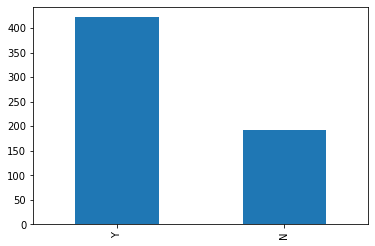

In [12]:
train['Loan_Status'].value_counts().plot.bar()

In [13]:
#Now visualize categorical, ordinal and numerical avriables seperately.
#categorical variables are Gender, Marries, Self-employeed, Credit history, Loan status(Traget variable)
#ordinal variable are Dependents, education, property area
#numerical variables are Applicantincome, co-applicantincome, loan amount, loan amount term


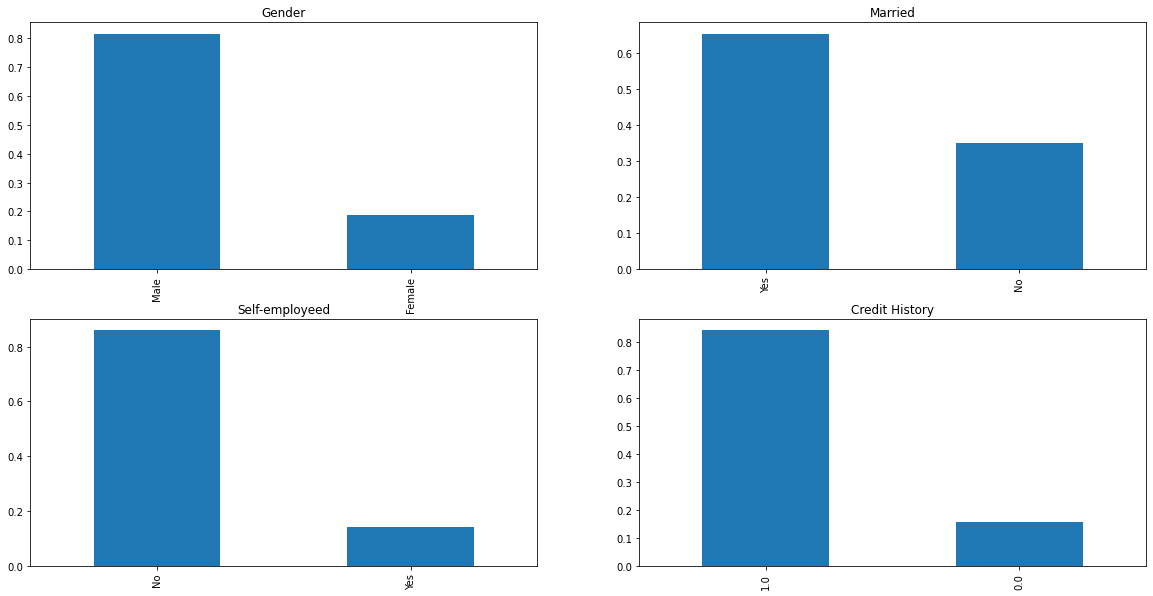

In [14]:
#independent variable(categorical)

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self-employeed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit History")
plt.show()

*80% gender in the data is Male.

*arround 65% individuals in the data is married

*85% individuals are not self employeed, only 15% are self employeed

*more than 80% individuals are repaid their loans.

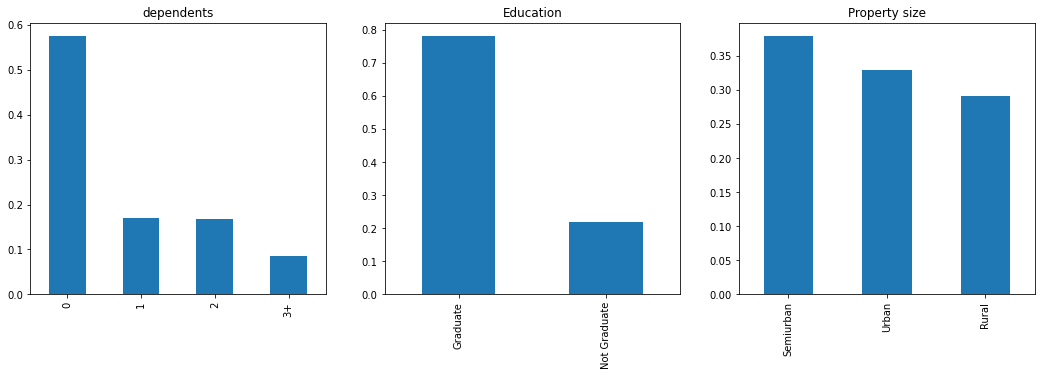

In [15]:
#ordinal variables

plt.figure(1)
plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(18,5), title='dependents')
plt.subplot(132)
train["Education"].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property size")
plt.show()

*More than 55% individuals had no dependents.

*75% loan applicants are graduates.

*Most of the applicants are from semiurban.

<AxesSubplot:>

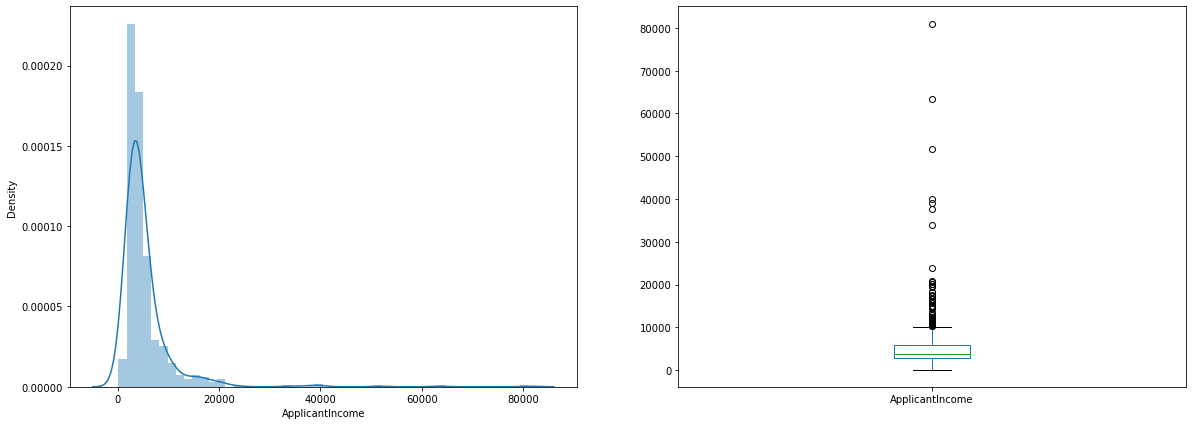

In [16]:
#independent variable(numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,7))

Text(0.5, 0.98, '')

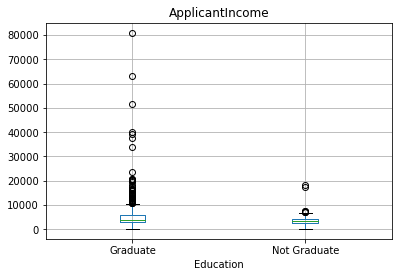

In [17]:
train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle("")

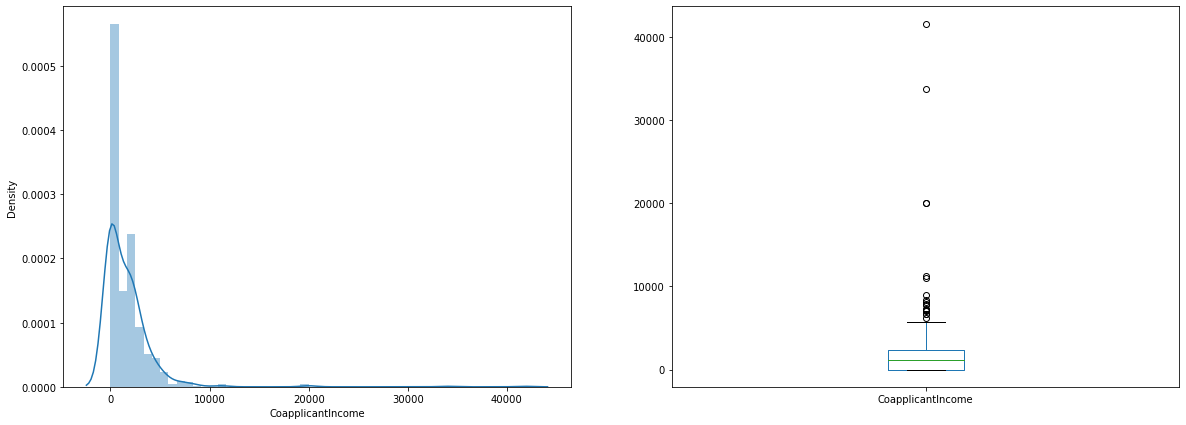

In [18]:
#distrubution of coapplicantIncome
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(20,7))
plt.show()

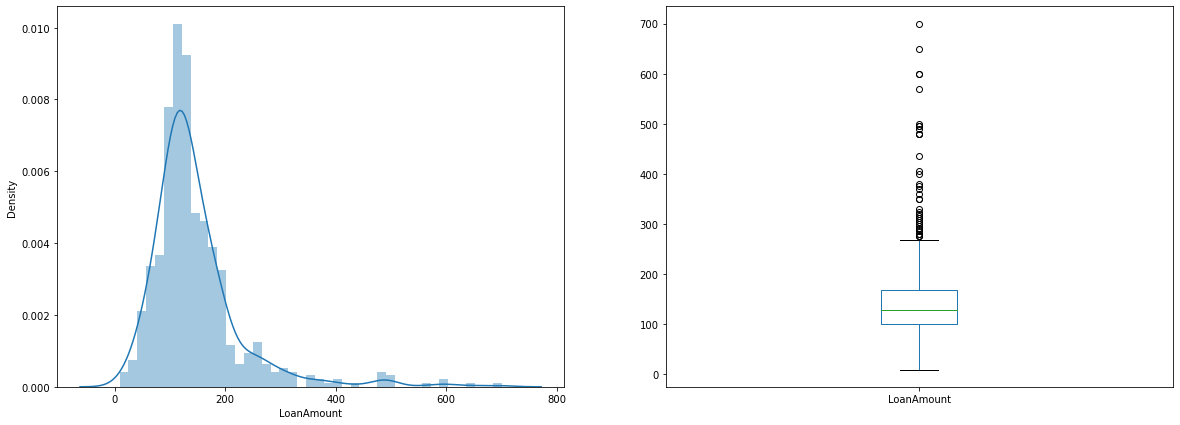

In [19]:
#distrubution of LoanAmount
plt.figure(1)
plt.subplot(121)
sns.distplot(train["LoanAmount"])
plt.subplot(122)
train["LoanAmount"].plot.box(figsize=(20,7))
plt.show()

**Bivariate Analysis**

Hypothesis 

1.Applicant with high Income have more chances of loan approval.

2.Applicant who repaid there last loan have higher chances of loan approval.

3.If the Loan Amount is less chances of loan approval is higher.

4.if monthly loan repay amount is less, chances of loan approval is high.

Try this hypothesis by bivariate analysis.
  

<AxesSubplot:xlabel='Gender'>

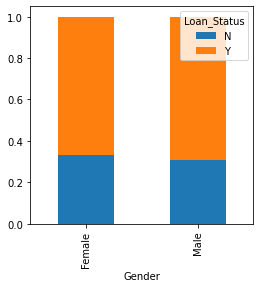

In [20]:
#Independent variable(categorical) vs target variable
#Gender vs Loan_status

Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

The proportion of male and female applicant is more or less the same for both approved and unapproved loans.

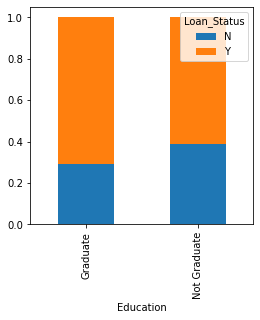

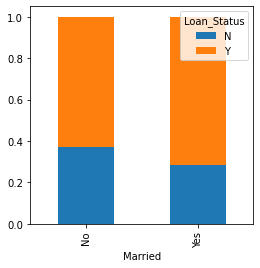

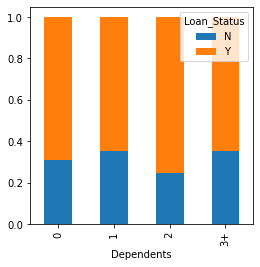

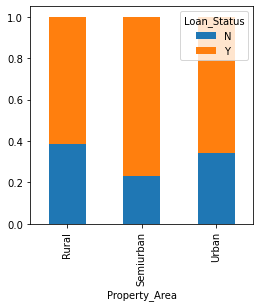

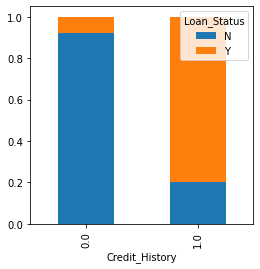

<AxesSubplot:xlabel='Self_Employed'>

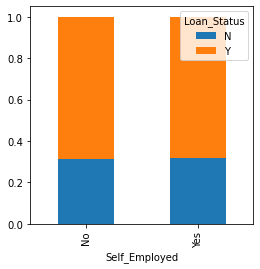

In [21]:
#bivariate Analysis

#Education vs Loan_Status
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

#Married vs Laon_status
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()


#Dependents vs Laon_status
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

#Property_Area vs Laon_status
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

#Credit_History vs Loan_Status
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

#Self_employeed vs Loan_status
Self_employeed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_employeed.div(Self_employeed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Loan_Status'>

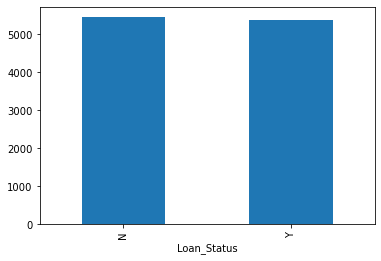

In [22]:
#numerical variable vs target variable

train.groupby('Loan_Status')["ApplicantIncome"].mean().plot.bar()

There is no different in the mean applicant income for loan_status.
lets make a bins as per range of income.


In [23]:
bins =[0,2500,4000,6000,18000]
group = ['Low', "Average", 'High','Very High']
train["Income_bin"] = pd.cut(train["ApplicantIncome"], bins, labels=group) 

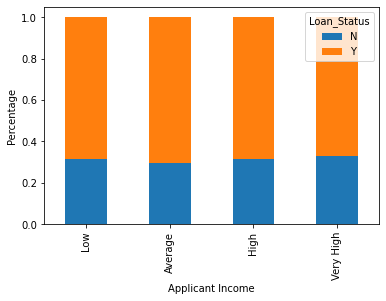

In [24]:
Income_bin = pd.crosstab(train['Income_bin'], train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Applicant Income')
P=plt.ylabel('Percentage')


In [29]:
#Coapplicant income vs Loan_status

bins=[0,1000,3000,42000] 
group = ['Low','Average','High']
train['Coapplicant_income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

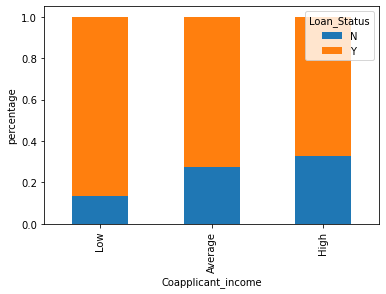

In [30]:
Coapplicant_income_bin = pd.crosstab(train['Coapplicant_income_bin'], train["Loan_Status"])
Coapplicant_income_bin.div(Coapplicant_income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Coapplicant_income')
P=plt.ylabel('percentage')

In [31]:
train["Total_income"] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [32]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average', "High", 'Very High']
train['Total_income_bin'] = pd.cut(train['Total_income'],bins, labels=group)

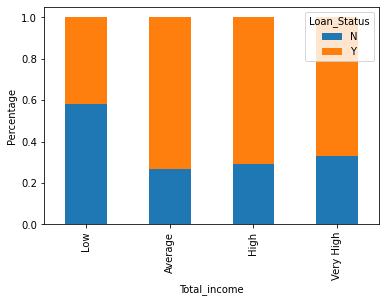

In [33]:
Total_income_bin = pd.crosstab(train['Total_income_bin'], train['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total_income')
P=plt.ylabel('Percentage')

In [34]:
bins = [0,100,200,700]
group = ['Low','Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

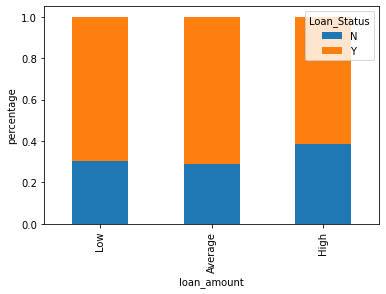

In [35]:
Loan_Amount = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
Loan_Amount.div(Loan_Amount.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('loan_amount')
P=plt.ylabel('percentage')

In [36]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_income_bin', 'Total_income',
       'Total_income_bin', 'LoanAmount_bin'],
      dtype='object')

In [37]:
train = train.drop(['Income_bin', 'Coapplicant_income_bin', 'Total_income', 'Total_income_bin', 'LoanAmount_bin'], axis = 1)

In [38]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

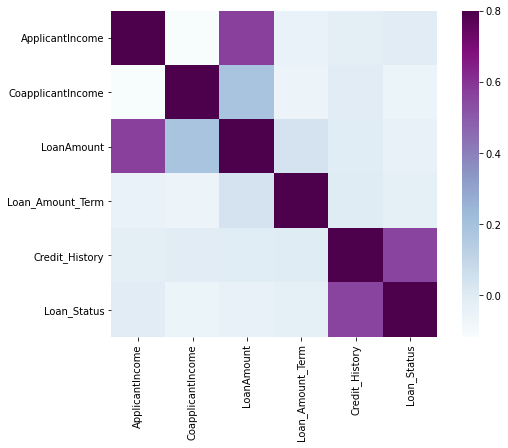

In [39]:
matrix=train.corr()
f, ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

In [40]:
#missing values and outlier treatment
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
#fill null values by mode in categorical variables
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train["Married"].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train["Credit_History"].mode()[0], inplace=True)

In [42]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
#filling nullvalues for numerical variables
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [44]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [45]:
train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [46]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [47]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [48]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [49]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [50]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [51]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])

In [52]:
train['LoanAmount_log'].histt(bins=20)

AttributeError: 'Series' object has no attribute 'histt'

In [53]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [54]:
#drop Loan_id from train and test table.
train = train.drop(['Loan_ID'], axis=1)
test = test.drop(['Loan_ID'], axis=1)

In [55]:
X = train.drop(['Loan_Status'], axis=1)
y=train.Loan_Status

In [56]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [57]:
X=pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
LogisticRegression(C = 1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001, verbose=0 , warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [64]:
pred_cv = model.predict(X_cv)

In [65]:
accuracy_score(y_cv, pred_cv)

0.8054054054054054

In [66]:
pred_test = model.predict(test)

In [72]:
submission = pd.read_csv("F:\Programing app\Loan prediciton project data\sample_submission_49d68Cx.csv")

In [73]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [74]:
submission['Loan_Status'] = pred_test

In [75]:
submission['Loan_ID'] = test_original['Loan_ID']

In [76]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [79]:
submission['Loan_Status'].replace(0, 'N', inplace=True )
submission['Loan_Status'].replace(1, 'Y', inplace =True)

In [80]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [81]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [82]:
from sklearn.model_selection import StratifiedKFold

In [91]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr,xvl=X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy score', score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score 0.8048780487804879

2 of kfold 5
accuracy score 0.8373983739837398

3 of kfold 5
accuracy score 0.7804878048780488

4 of kfold 5
accuracy score 0.7886178861788617

5 of kfold 5
accuracy score 0.7950819672131147
